# Assignment 1

Fundamentals of Machine Learning <br>
Master Data-Driven Design <br>
University of Applied Science Utrecht

In [1]:
# importing stuff for drawing plots
import pandas as pd
%matplotlib inline

In [2]:
# open de dataframes with the right seperators
step_data = pd.read_csv('Assignment 1 - steps data.csv', sep=';')
survey_data = pd.read_csv('Assignment 1 - survey data.csv')

In [3]:
# merge the two dataframes and show the head of the dataframe
data = survey_data.merge(step_data, on = 'id')
data.head(5)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# create a temporary dataframe for the graph + flip so we have the dates in a column
temporary_step_data = step_data.transpose()
# drop id, otherwise we count that one in the average amount of steps per day
temporary_step_data = temporary_step_data.drop(['id'])
# create a new column with the average amount of steps per day
temporary_step_data['mean_steps'] = temporary_step_data.loc[: , "0":"927"].mean(axis=1)
# make the dates a seperate column instead of just the index
temporary_step_data['dates'] = temporary_step_data.index

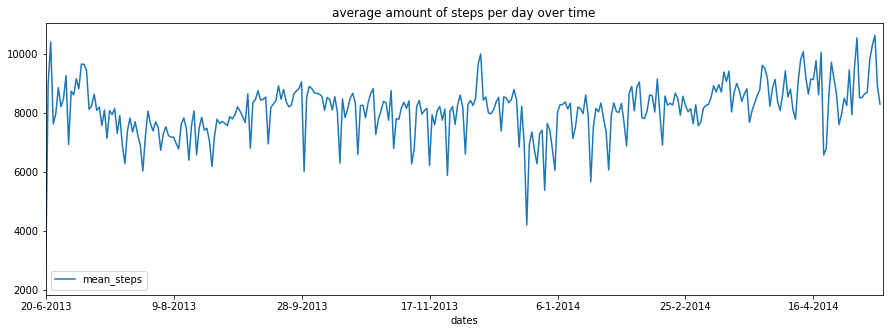

In [5]:
# show the plot
temporary_step_data.plot.line(x='dates', y='mean_steps', title = 'average amount of steps per day over time', figsize=(15, 5))

Text(0, 0.5, 'frequency')

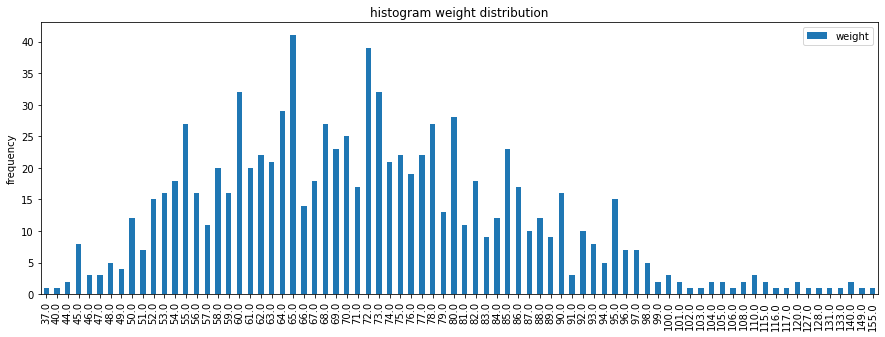

In [6]:
# take weight as the variabele to be analyzed and create a frequency histogram
data[['weight']].apply(pd.value_counts).sort_index().plot(kind='bar', title = 'histogram weight distribution', figsize=(15,5)).set_ylabel("frequency")

Text(0.5, 0, 'weight in kg')

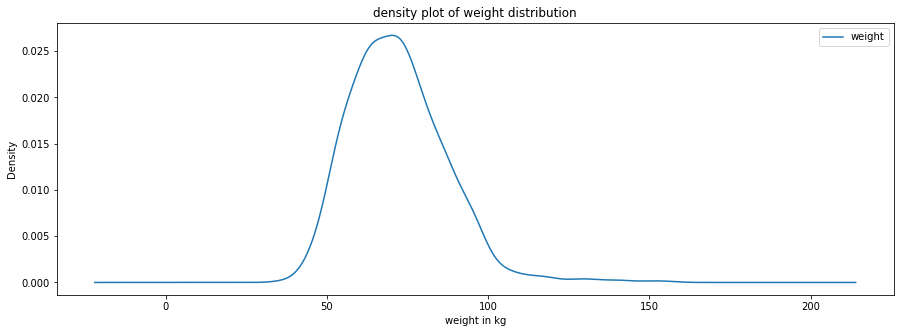

In [7]:
# create a density plot for the variable weight
data[['weight']].plot.kde(title = 'density plot of weight distribution', figsize=(15,5)).set_xlabel("weight in kg")

In [8]:
# calculate some statistics for weight
print('median: ' + str(float(data[['weight']].median())))
print('mode: ' + str(data[['weight']].mode()['weight'][0]))
print('mean: ' + str(float(data[['weight']].mean())))
print('standard deviation: ' + str(float(data[['weight']].std())))
print('variance: ' + str(float(data[['weight']].var())))

median: 71.0
mode: 65.0
mean: 72.0453074433657
standard deviation: 15.097312030554507
variance: 227.92883054792583


The variable weight is reasonably normally distributed, with an average of 72.0 and a standard deviation of 16.1. The distribution is slightly positively skewed (to the right). This can be seen in both the histogram, the density plot and the statistics (the mean exceeds the mode). The reason for the skewness is outliers on the higher end. The heaviest person weighs 83 kg more than average, which is approximately 5 times the standard deviation, while the lightest person weighs 35 kg less than average, which is around 2 times the standard deviation. This is logical, considering that people need a certain amount of weight to be able to exist but can gain quite some weight before it ultimately kills them.